<a href="https://colab.research.google.com/github/ToluGb/Hamoye-DSI-2020/blob/master/HSDC_Stage2_Quiz_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving energydata_complete.csv to energydata_complete.csv


In [4]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
# Rename the columns

column_names = {'Appliances': 'appliances (Wh)', 'lights': 'lights (Wh)',
                'T1': 'kitchen temperature', 'RH_1': 'kitchen humidity', 
                'T2': 'living-room temperature', 'RH_2': 'living-room humidity', 
                'T3': 'laundry-room temperature', 'RH_3': 'laundry-room humidity', 
                'T4': 'office-room temperature', 'RH_4': 'office-room humidity', 
                'T5': 'bathroom temperature', 'RH_5': 'bathroom humidity', 
                'T6': 'northside-outdoor temperature', 'RH_6': 'northside-outdoor humidity', 
                'T7': 'ironing-room temperature', 'RH_7': 'ironing-room humidity', 
                'T8': 'teenager-room temperature', 'RH_8': 'teenager-room humidity', 
                'T9': 'parents-room temperature', 'RH_9': 'parents-room humidity', 
                'T_out': 'outside temperature', 'RH_out': 'outside humidity', 
                'Press_mm_hg': 'pressure', 'Windspeed': 'windspeed', 
                'Visibility': 'visibility', 'Tdewpoint': 't-dew-point',
                'date': 'date-time'
               }

In [6]:
df = df.rename(columns=column_names)
df.head()

,date-time,appliances (Wh),lights (Wh),kitchen temperature,kitchen humidity,living-room temperature,living-room humidity,laundry-room temperature,laundry-room humidity,office-room temperature,office-room humidity,bathroom temperature,bathroom humidity,northside-outdoor temperature,northside-outdoor humidity,ironing-room temperature,ironing-room humidity,teenager-room temperature,teenager-room humidity,parents-room temperature,parents-room humidity,outside temperature,pressure,outside humidity,windspeed,visibility,t-dew-point,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date-time                      19735 non-null  object 
 1   appliances (Wh)                19735 non-null  int64  
 2   lights (Wh)                    19735 non-null  int64  
 3   kitchen temperature            19735 non-null  float64
 4   kitchen humidity               19735 non-null  float64
 5   living-room temperature        19735 non-null  float64
 6   living-room humidity           19735 non-null  float64
 7   laundry-room temperature       19735 non-null  float64
 8   laundry-room humidity          19735 non-null  float64
 9   office-room temperature        19735 non-null  float64
 10  office-room humidity           19735 non-null  float64
 11  bathroom temperature           19735 non-null  float64
 12  bathroom humidity              19735 non-null 

In [8]:
df.describe()


,appliances (Wh),lights (Wh),kitchen temperature,kitchen humidity,living-room temperature,living-room humidity,laundry-room temperature,laundry-room humidity,office-room temperature,office-room humidity,bathroom temperature,bathroom humidity,northside-outdoor temperature,northside-outdoor humidity,ironing-room temperature,ironing-room humidity,teenager-room temperature,teenager-room humidity,parents-room temperature,parents-room humidity,outside temperature,pressure,outside humidity,windspeed,visibility,t-dew-point,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


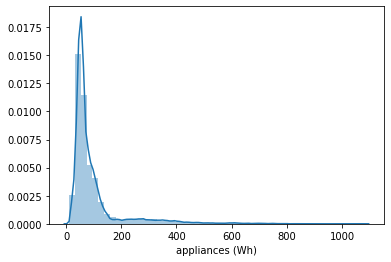

In [9]:
sns.distplot(df['appliances (Wh)'])

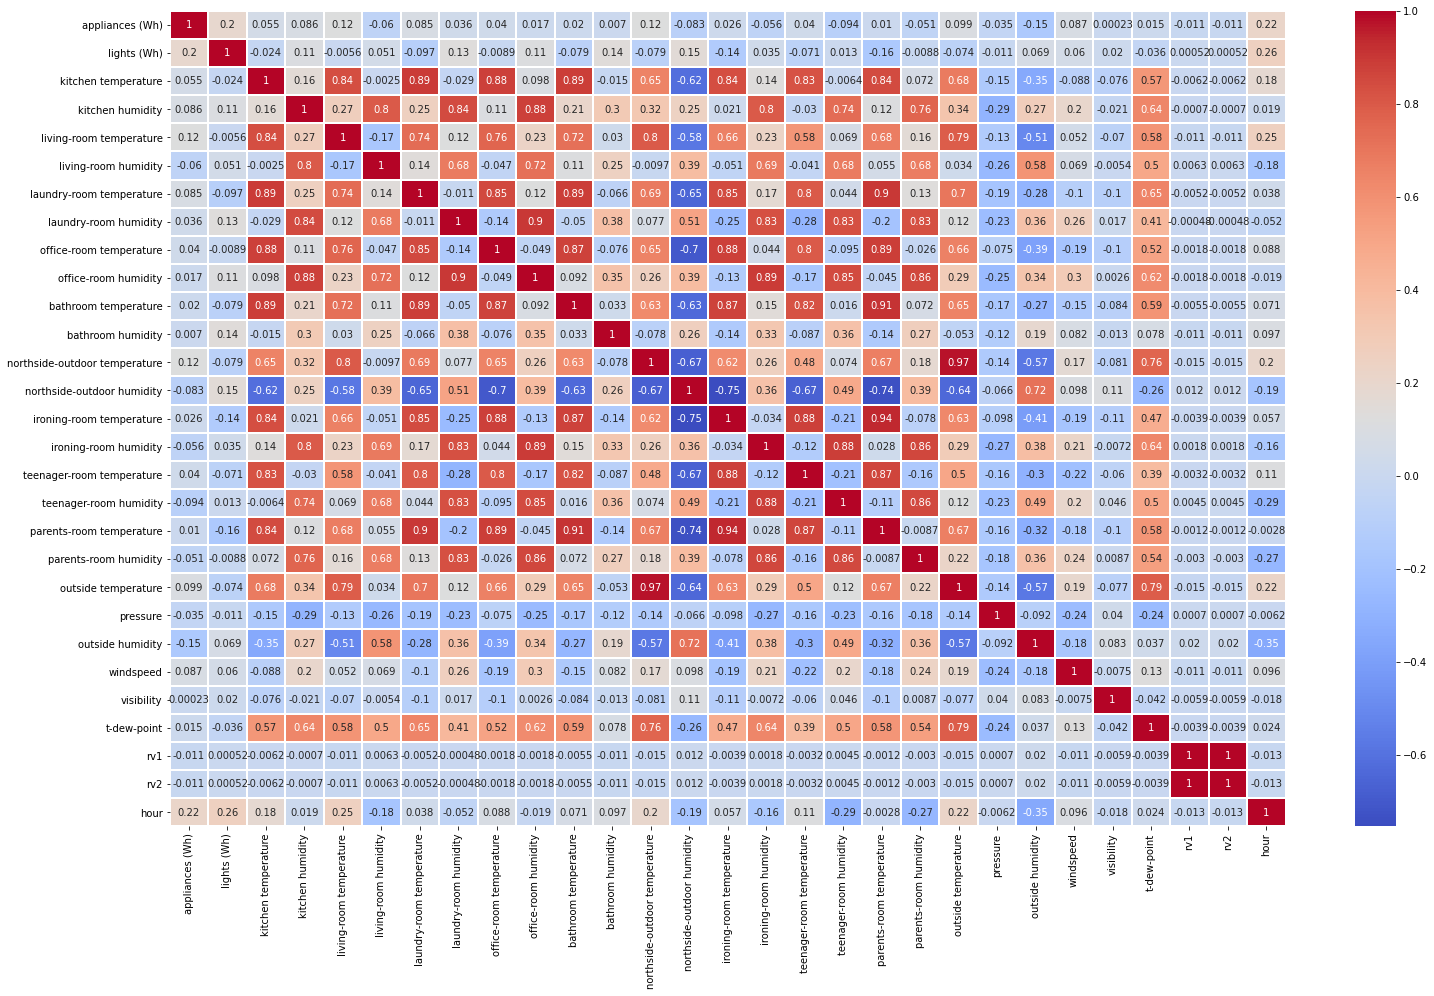

In [66]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1, linecolor='white')

In [58]:
df.corr()['appliances (Wh)'].abs().sort_values()

visibility                       0.000230
bathroom humidity                0.006955
parents-room temperature         0.010010
rv1                              0.011145
rv2                              0.011145
t-dew-point                      0.015353
office-room humidity             0.016965
bathroom temperature             0.019760
ironing-room temperature         0.025801
pressure                         0.034885
laundry-room humidity            0.036292
teenager-room temperature        0.039572
office-room temperature          0.040281
parents-room humidity            0.051462
kitchen temperature              0.055447
ironing-room humidity            0.055642
living-room humidity             0.060465
northside-outdoor humidity       0.083178
laundry-room temperature         0.085060
kitchen humidity                 0.086031
windspeed                        0.087122
teenager-room humidity           0.094039
outside temperature              0.099155
northside-outdoor temperature    0

**Time and Energy**

In [12]:
# creating instances of the months and days of the week
months_of_year = ['January', 'February', 'March', 'April', 'May']
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [13]:
# Change date-time field to python datetime object.
df['date-time'] = pd.to_datetime(df['date-time'], format='%Y-%m-%d %H:%M:%S')

In [14]:
# Sorting according to month of the year
df['month'] = df['date-time'].dt.month_name()
df['month'] = pd.Categorical(df['month'], months_of_year) 

In [15]:
# Sorting according to day of week
df['week'] = df['date-time'].dt.day_name()
df['week'] = pd.Categorical(df['week'], days_of_week) 

In [16]:
df['hour'] = df['date-time'].dt.hour

In [17]:
df.head()

,date-time,appliances (Wh),lights (Wh),kitchen temperature,kitchen humidity,living-room temperature,living-room humidity,laundry-room temperature,laundry-room humidity,office-room temperature,office-room humidity,bathroom temperature,bathroom humidity,northside-outdoor temperature,northside-outdoor humidity,ironing-room temperature,ironing-room humidity,teenager-room temperature,teenager-room humidity,parents-room temperature,parents-room humidity,outside temperature,pressure,outside humidity,windspeed,visibility,t-dew-point,rv1,rv2,month,week,hour
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,January,Monday,17
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,January,Monday,17
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,January,Monday,17
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,January,Monday,17
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,January,Monday,17


In [18]:
#Grouping the average energy consumed by appliances and light every month
months = df['month'].unique()
appliance_data = df.groupby('month')['appliances (Wh)'].mean()
lights_data = df.groupby('month')['lights (Wh)'].mean()

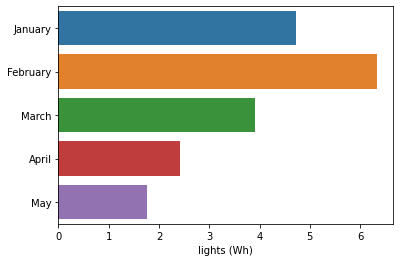

In [19]:
sns.barplot(x=lights_data, y=months, data=df)

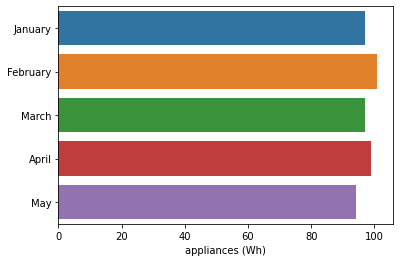

In [20]:
sns.barplot(x=appliance_data, y=months, data=df)

**Linear Regression Model Development**

In [21]:
df.columns

Index(['date-time', 'appliances (Wh)', 'lights (Wh)', 'kitchen temperature',
       'kitchen humidity', 'living-room temperature', 'living-room humidity',
       'laundry-room temperature', 'laundry-room humidity',
       'office-room temperature', 'office-room humidity',
       'bathroom temperature', 'bathroom humidity',
       'northside-outdoor temperature', 'northside-outdoor humidity',
       'ironing-room temperature', 'ironing-room humidity',
       'teenager-room temperature', 'teenager-room humidity',
       'parents-room temperature', 'parents-room humidity',
       'outside temperature', 'pressure', 'outside humidity', 'windspeed',
       'visibility', 't-dew-point', 'rv1', 'rv2', 'month', 'week', 'hour'],
      dtype='object')

In [22]:
# Scaling the data using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
new_df = df.drop(['date-time','lights (Wh)','month','week','hour'], axis=1)
new_df.head()

,appliances (Wh),kitchen temperature,kitchen humidity,living-room temperature,living-room humidity,laundry-room temperature,laundry-room humidity,office-room temperature,office-room humidity,bathroom temperature,bathroom humidity,northside-outdoor temperature,northside-outdoor humidity,ironing-room temperature,ironing-room humidity,teenager-room temperature,teenager-room humidity,parents-room temperature,parents-room humidity,outside temperature,pressure,outside humidity,windspeed,visibility,t-dew-point,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [24]:
normalised_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)
normalised_df.head()

,appliances (Wh),kitchen temperature,kitchen humidity,living-room temperature,living-room humidity,laundry-room temperature,laundry-room humidity,office-room temperature,office-room humidity,bathroom temperature,bathroom humidity,northside-outdoor temperature,northside-outdoor humidity,ironing-room temperature,ironing-room humidity,teenager-room temperature,teenager-room humidity,parents-room temperature,parents-room humidity,outside temperature,pressure,outside humidity,windspeed,visibility,t-dew-point,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [25]:
features_df = normalised_df.drop(columns=['appliances (Wh)'])

In [26]:
target_variable = normalised_df['appliances (Wh)']
target_variable.head()

0    0.046729
1    0.046729
2    0.037383
3    0.037383
4    0.046729
Name: appliances (Wh), dtype: float64

**Splitting the data into training and test set**

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target_variable, test_size=0.3, random_state=42)

**Fitting the Linear Regression Model**

In [28]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Obtaining Predictions**

In [29]:
y_pred = linear_model.predict(x_test)

**Mean Absolute Error**

In [30]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
round(mae, 3) 	

0.05

**R-Squared**

In [31]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
round(r2_score, 3)	

0.149

**Residual Sum of Squares (RSS)**

In [32]:
rss = np.sum(np.square(y_test - y_pred))
round(rss, 3)	   

45.348

**Root Mean Squared Error**

In [33]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse, 3) 	

0.088

**Linear Regression Assumptions**

1. Linearity

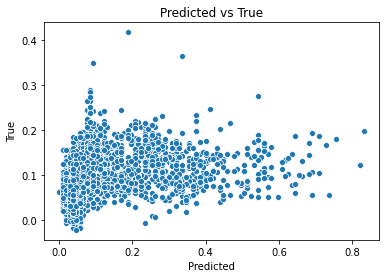

In [61]:
sns.scatterplot(y_test, y_pred)
plt.title('Predicted vs True')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

2. Normality

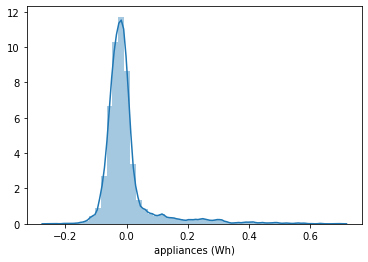

In [35]:
sns.distplot(y_test-y_pred)

**Regularization with Ridge and Lasso Regression**

In [39]:
# Lasso Regression

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
# Ridge Regression

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  """this function returns the weight of every feature"""
  
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [41]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [42]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [56]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,living-room humidity,-0.456698,-0.401134,-0.000000
1,outside temperature,-0.321860,-0.250765,0.000000
2,living-room temperature,-0.236178,-0.193880,0.000000
3,parents-room temperature,-0.189941,-0.188584,-0.000000
4,teenager-room humidity,-0.157595,-0.156596,-0.000110
5,outside humidity,-0.077671,-0.050541,-0.049557
6,ironing-room humidity,-0.044614,-0.046291,-0.000000
7,parents-room humidity,-0.039800,-0.041701,-0.000000
8,bathroom temperature,-0.015657,-0.020727,-0.000000
9,kitchen temperature,-0.003281,-0.021549,0.000000
